# FOB Data Visualization and Exploratory Data Anlalysis

## Setup and Library Imports

In [2]:
import re
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest

In [3]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [5]:
fob_songs = pd.read_csv('data/processed/FOB_songs_processed.csv', index_col=0)
fob_songs.head()

,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date,total_words,unique_words,duration_min,class
0,Honorable Mention,0.384,0.969,5,-3.903,1,0.0985,0.00236,0.000000,0.277,0.374,103.858,4,2003-03-25,201,74,3.43,pre-hiatus
1,Calm Before the Storm,0.338,0.919,9,-5.538,1,0.3160,0.00391,0.000251,0.307,0.464,173.643,4,2003-03-25,289,141,4.73,pre-hiatus
2,Switchblades and Infidelity,0.374,0.990,11,-4.092,1,0.3800,0.00673,0.000003,0.250,0.336,135.163,4,2003-03-25,165,45,3.24,pre-hiatus
3,Pretty In Punk,0.430,0.963,9,-4.803,1,0.1610,0.00347,0.000000,0.298,0.268,125.773,4,2003-03-25,249,85,3.62,pre-hiatus
4,Growing Up,0.291,0.971,0,-4.066,1,0.3010,0.00926,0.000000,0.287,0.408,149.928,3,2003-03-25,174,94,2.82,pre-hiatus


### Data Visualization

In [6]:
# Numerical– instrumentalness is left out because it doesn't graph well
numerical = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'duration_min', 'total_words', 'unique_words']
categorical = ['key','mode', 'time_signature']
target = fob_songs['class']

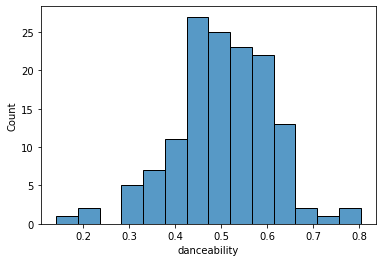

danceability


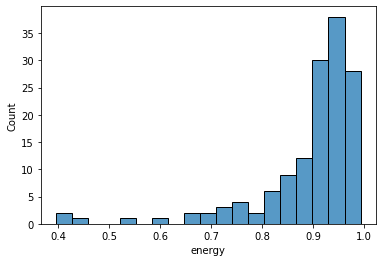

energy


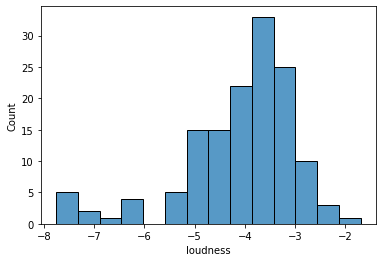

loudness


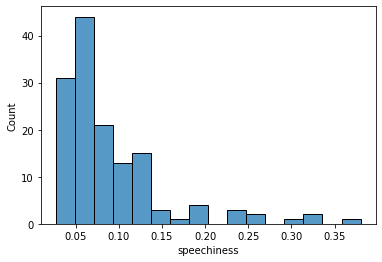

speechiness


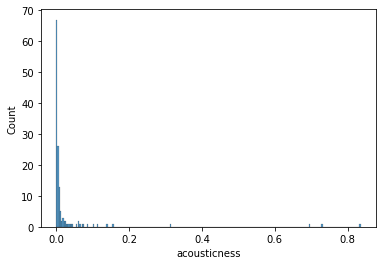

acousticness


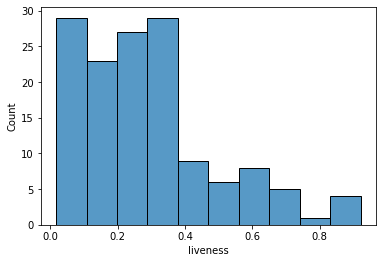

liveness


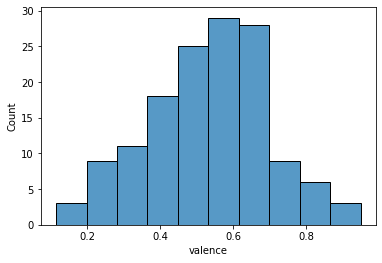

valence


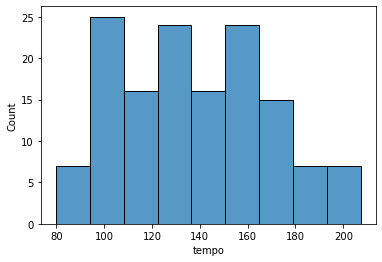

tempo


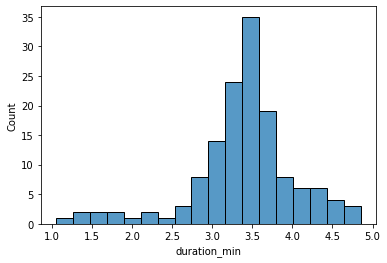

duration_min


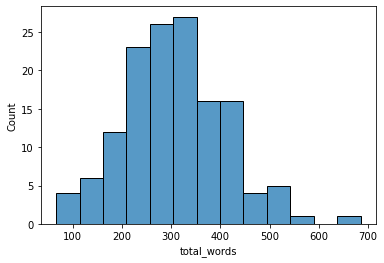

total_words


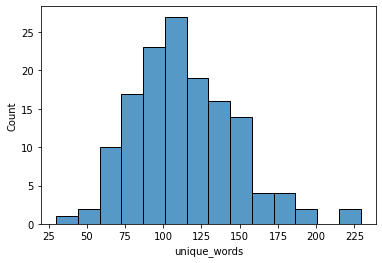

unique_words


In [7]:
for i, feature in enumerate(numerical):
    plt.figure(i)
    sns.histplot(data=fob_songs, x = feature)
    plt.show()
    print(feature)

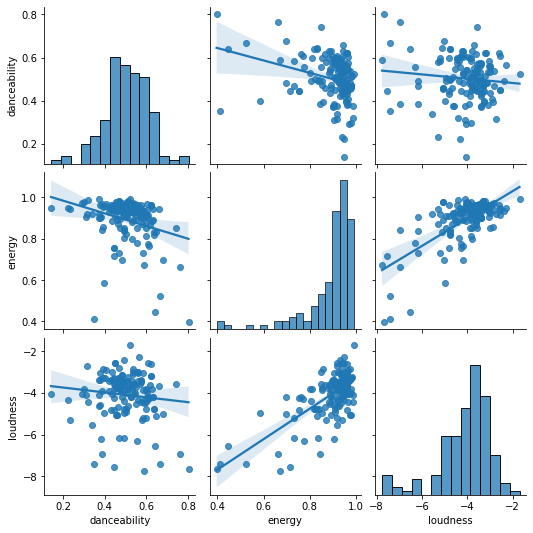

In [8]:
numerical_subset1 = fob_songs[['danceability', 'energy', 'loudness']]
sns.pairplot(numerical_subset1, kind = 'reg')

### Reading Scatter Plot Matrix Output
- Histograms on the diagonal show the estimated distribution of a numerical variable <br>
- Off the diagonals are relationship plots between variables <br>
- Middle chart in top row shows a scatter plot with danceability as the y-axis and energy as the x-axis

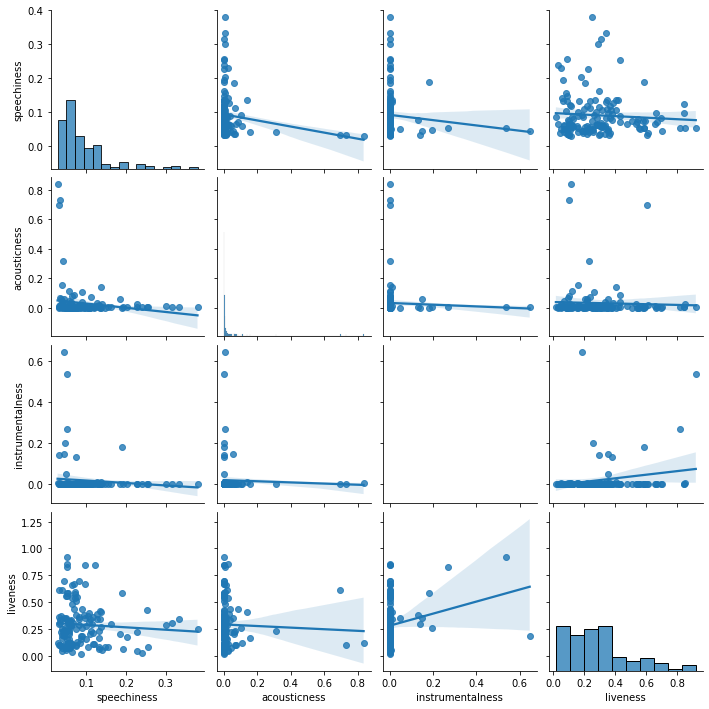

In [9]:
numerical_subset2 = fob_songs[['speechiness', 'acousticness', 'instrumentalness', 'liveness']]
sns.pairplot(numerical_subset2, kind = 'reg')

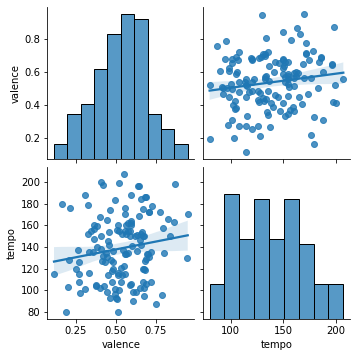

In [10]:
numerical_subset3 = fob_songs[['valence', 'tempo']]
sns.pairplot(numerical_subset3, kind = 'reg')

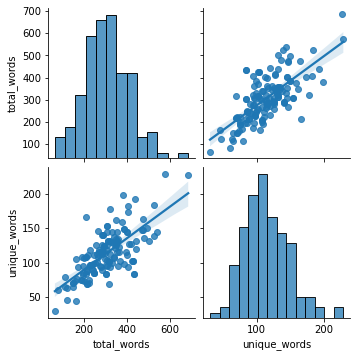

In [11]:
numerical_subset4 = fob_songs[['total_words', 'unique_words']]
a = sns.pairplot(numerical_subset4, kind = 'reg')

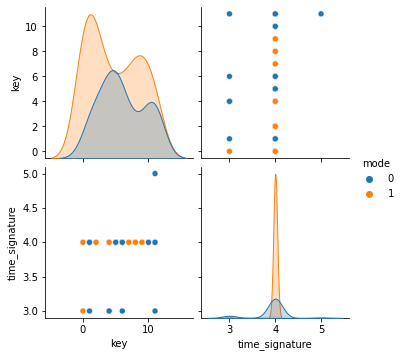

In [12]:
# Show major and minor in different colors across musical variables
categorical_subset1 = fob_songs[['key','mode', 'time_signature']]
sns.pairplot(categorical_subset1, hue = 'mode')

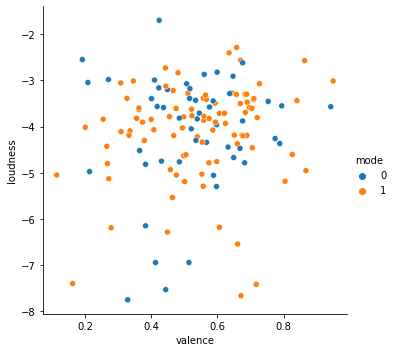

In [13]:
# Check major and minor in relation to valence and loudness, which describe a song's mood
sns.relplot(x="valence", y="loudness", hue="mode", data=fob_songs)

### Understanding the Target Variable: Class

In [14]:
# Count songs in each class
mode_df = fob_songs[['class', 'mode']].copy()
post_count = DataFrame(mode_df.groupby(by=['class']).size())[0][0]
pre_count = DataFrame(mode_df.groupby(by=['class']).size())[0][1]
print(f'There are {pre_count} pre-hiatus songs and {post_count} post-hiatus songs')

There are 89 pre-hiatus songs and 52 post-hiatus songs


In [15]:
# Balance of dataset
print(f'Pre-hiatus: {pre_count/len(fob_songs)*100:.2f}% of dataset')
print(f'Post-hiatus: {post_count/len(fob_songs)*100:.2f}% of dataset')

Pre-hiatus: 63.12% of dataset
Post-hiatus: 36.88% of dataset


In [16]:
mode_df['mode'] = mode_df['mode'].replace(1, 'major').replace(0, 'minor')
grouped_modes = DataFrame(mode_df.groupby(by=['class', 'mode']).size())
post_major, post_minor, pre_major, pre_minor = grouped_modes[0]

In [17]:
mode_dist = DataFrame({'class': ['pre-hiatus', 'pre-hiatus', 'post-hiatus', 'post-hiatus'],
                       'mode': ['major', 'minor', 'major', 'minor'],
                       'count': [pre_major, pre_minor, post_major, post_minor],
                       'total': [pre_count, pre_count, post_count, post_count]})
mode_dist['percent'] = (mode_dist['count'] / mode_dist['total'])*100
mode_dist

,class,mode,count,total,percent
0,pre-hiatus,major,64,89,71.910112
1,pre-hiatus,minor,25,89,28.089888
2,post-hiatus,major,27,52,51.923077
3,post-hiatus,minor,25,52,48.076923


<AxesSubplot:xlabel='class', ylabel='percent'>

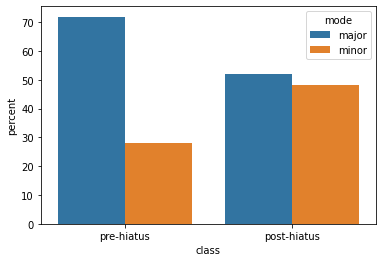

In [28]:
sns.barplot(x='class', y='percent', hue='mode', data=mode_dist)

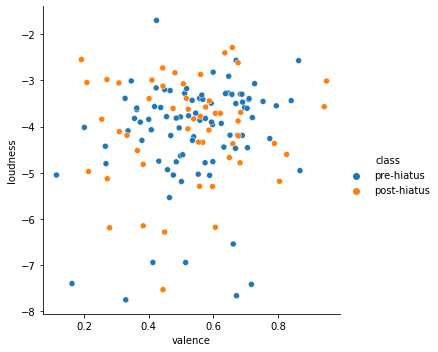

In [20]:
sns.relplot(x="valence", y="loudness", hue="class", data=fob_songs)

### Investigation: Are pre-hiatus and post-hiatus unique word counts different?
Note: Rat A Tat is the high outlier in the post-hiatus set

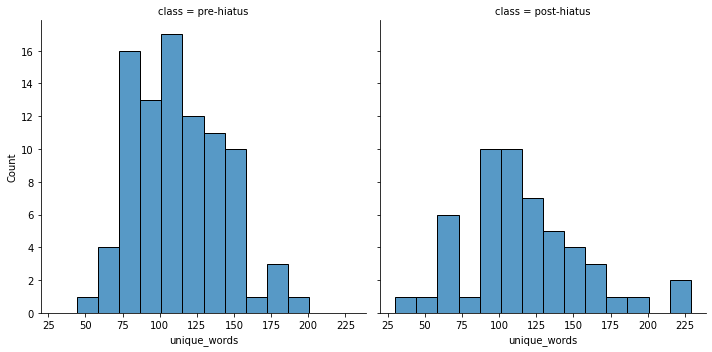

In [21]:
sns.displot(data=fob_songs, x="unique_words", col="class")

In [22]:
# Pull necessary columns for t-test
pre_sample = fob_songs[fob_songs['class'] == 'pre-hiatus']['unique_words']
post_sample = fob_songs[fob_songs['class'] == 'post-hiatus']['unique_words']

In [23]:
# Use z-test since the population variances are known
ztest(pre_sample, post_sample, value=0)

(-0.7435694169708799, 0.45713701108469984)

### Conclusion
P-value > 0.05 indicates evidence for H0. Therefore, we cannot assume there is a significant difference between the mean unique lyrics for the pre-hiatus and post-hiatus classes.

### More visualization

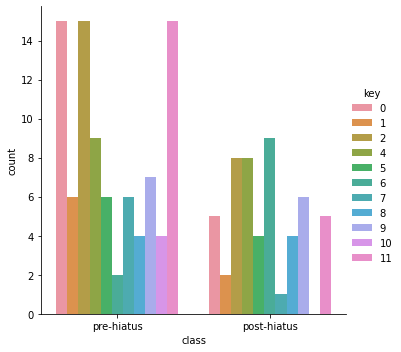

In [24]:
# Keys of all songs in both pre-hiatus and post-hiatus periods
sns.catplot(x='class', hue = 'key', kind = 'count', data = fob_songs)

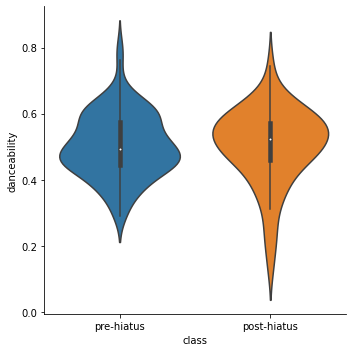

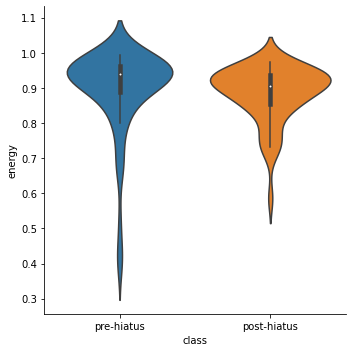

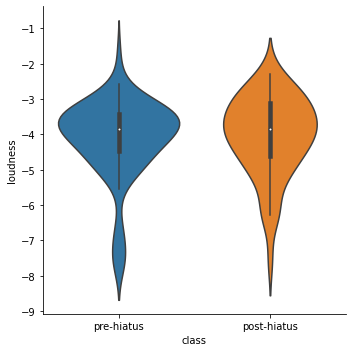

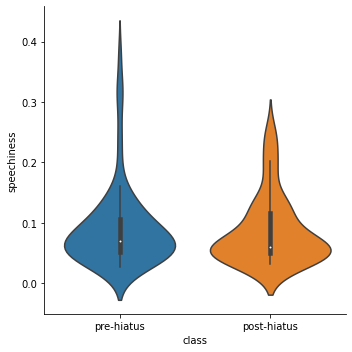

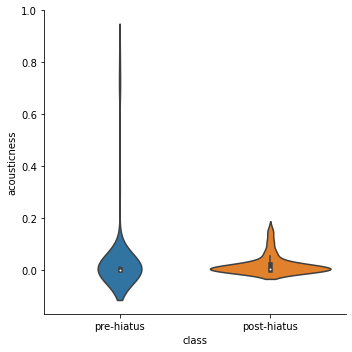

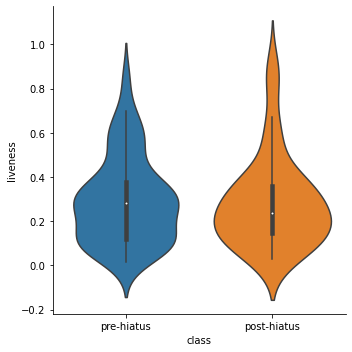

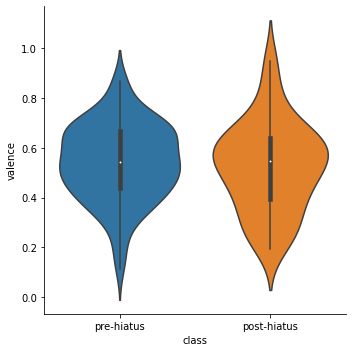

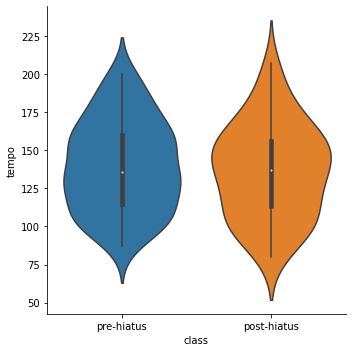

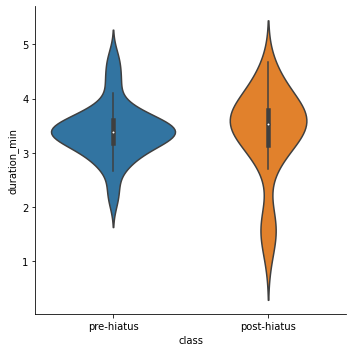

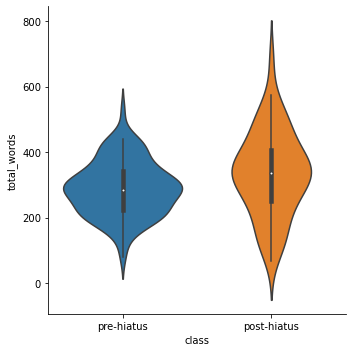

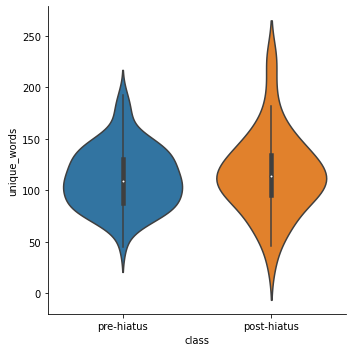

In [25]:
for col in numerical:
    sns.catplot(x='class', y=col, kind = 'violin', data = fob_songs)

### Summary Data

In [26]:
# Check for null values
fob_songs.isnull().sum()

title               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
release_date        0
total_words         0
unique_words        0
duration_min        0
class               0
dtype: int64

In [27]:
# Break down categorical data
for col in categorical:
    print(col)
    print(fob_songs[col].value_counts(), '\n')

key
2     23
11    20
0     20
4     17
9     13
6     11
5     10
1      8
8      8
7      7
10     4
Name: key, dtype: int64 

mode
1    91
0    50
Name: mode, dtype: int64 

time_signature
4    134
3      6
5      1
Name: time_signature, dtype: int64 



## Correlational Analysis

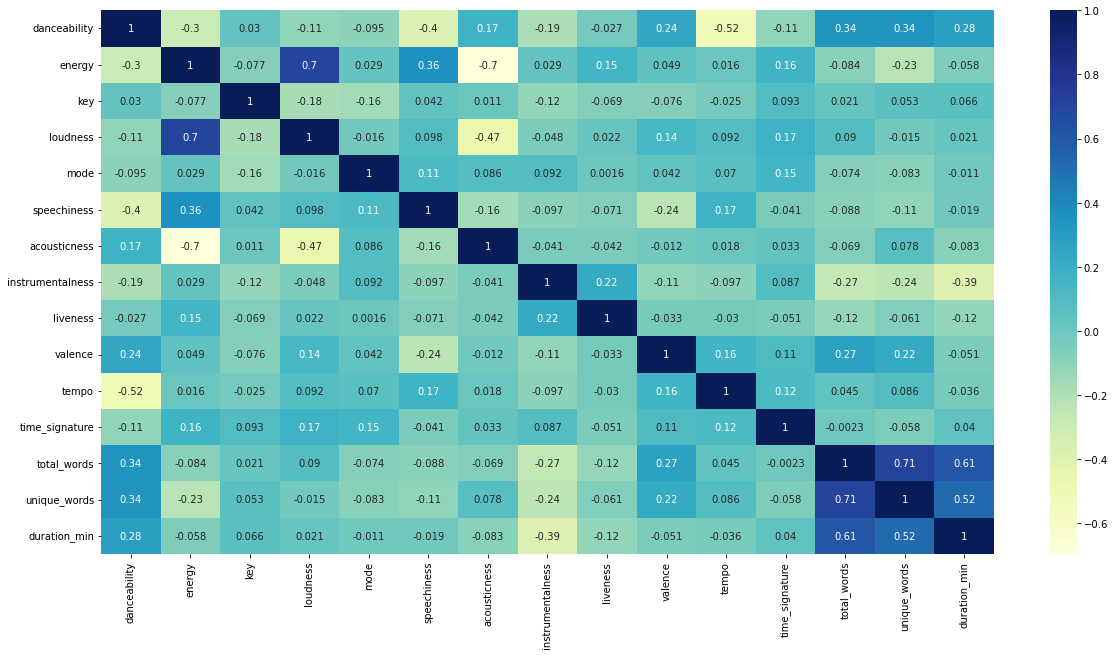

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(fob_songs.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [28]:
# Only significant correlation
correlations = fob_songs.corr()
correlations[abs(correlations) >= 0.5]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_words,unique_words,duration_min
danceability,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.516256,NaN,NaN,NaN,NaN
energy,NaN,1.000000,NaN,0.69574,NaN,NaN,-0.696096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,0.695740,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,-0.696096,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
valence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### Highest correlations
All correlations are sensible and expected; they don't tell us much about the data
- columns to themselves (1.0)
- total_words to unique_words
- total words to duration
- loudness to energy
- acousticness and energy
- It's strange that tempo has a negative correlation to danceability; <br>
you'd think it would be a positive correlation

In [29]:
fob_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,total_words,unique_words,duration_min
count,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.502872,0.891270,5.163121,-4.098043,0.64539,0.089589,0.030750,0.016588,0.291143,0.534936,138.621234,3.964539,306.283688,113.971631,3.380567
std,0.104109,0.107558,3.767576,1.126646,0.48010,0.063506,0.113241,0.078870,0.199129,0.163374,30.177990,0.220757,104.490828,33.625871,0.651331
min,0.141000,0.396000,0.000000,-7.756000,0.00000,0.027500,0.000045,0.000000,0.017000,0.115000,79.964000,3.000000,66.000000,30.000000,1.050000
25%,0.445000,0.872000,2.000000,-4.604000,0.00000,0.050200,0.000847,0.000000,0.122000,0.424000,114.522000,4.000000,230.000000,94.000000,3.160000
50%,0.500000,0.927000,5.000000,-3.840000,1.00000,0.064400,0.003680,0.000002,0.259000,0.545000,135.997000,4.000000,304.000000,112.000000,3.400000
75%,0.574000,0.956000,9.000000,-3.393000,1.00000,0.108000,0.009590,0.000050,0.366000,0.658000,160.040000,4.000000,363.000000,132.000000,3.730000
max,0.803000,0.993000,11.000000,-1.697000,1.00000,0.380000,0.835000,0.646000,0.922000,0.949000,207.185000,5.000000,685.000000,229.000000,4.850000


In [30]:
# Which songs have non-standard time signatures (not in 4/4 time)?
fob_songs[fob_songs['time_signature'] != 4]

,title,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_date,total_words,unique_words,duration_min,class
4,Growing Up,0.291,0.971,0,-4.066,1,0.3010,0.009260,0.000000,0.287,0.408,149.928,3,2003-03-25,174,94,2.82,pre-hiatus
32,Get Busy Living Or Get Busy Dying (Do Your Par...,0.638,0.834,4,-4.764,0,0.0497,0.003600,0.000000,0.560,0.485,126.044,3,2005-05-03,385,149,3.46,pre-hiatus
45,Get Busy Living Or Get Busy Dying (Do Your Par...,0.638,0.820,4,-4.749,0,0.0434,0.003730,0.000000,0.701,0.431,126.019,3,2006-01-01,385,149,3.46,pre-hiatus
106,Heaven’s Gate,0.398,0.586,6,-4.975,0,0.0344,0.016600,0.000000,0.334,0.214,176.043,3,2018-01-19,317,102,3.76,post-hiatus
122,We Were Doomed From The Start (The King Is Dead),0.446,0.716,11,-7.535,0,0.0574,0.000673,0.000817,0.156,0.444,98.707,3,2013-01-01,148,70,1.59,post-hiatus
123,Art Of Keeping Up Disappearances,0.141,0.948,11,-4.049,0,0.0743,0.001000,0.131000,0.380,0.521,199.081,5,2013-01-01,66,30,1.05,post-hiatus
135,Start Today,0.591,0.935,1,-4.472,0,0.1160,0.003750,0.000003,0.114,0.668,107.153,3,2005,196,96,2.05,pre-hiatus
